# Import Imp Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import Datasets

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
##statical Info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis(EDA)

<AxesSubplot:xlabel='Survived', ylabel='count'>

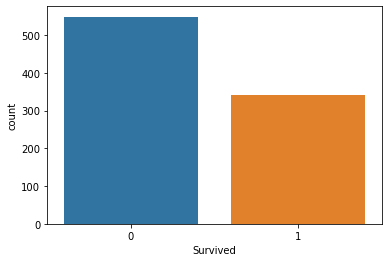

In [6]:
##categorical Attributes 
sns.countplot(train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

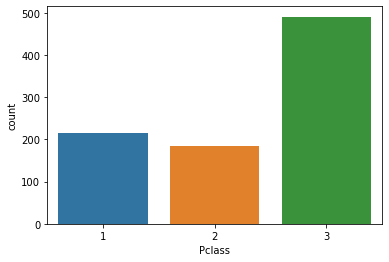

In [7]:
sns.countplot(train['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

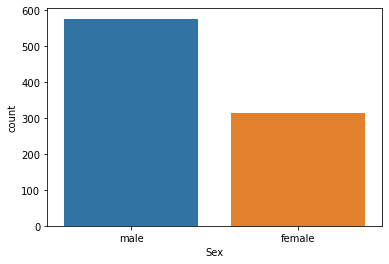

In [8]:
sns.countplot(train['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

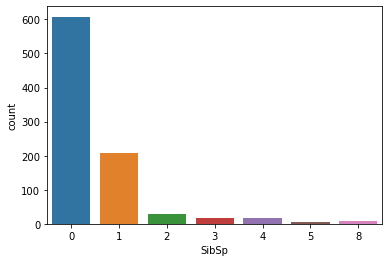

In [9]:
sns.countplot(train['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

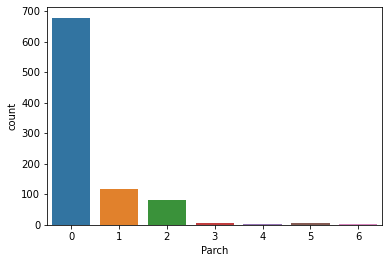

In [10]:
sns.countplot(train['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

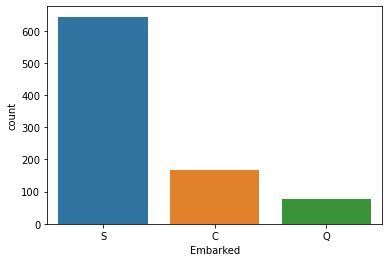

In [11]:
sns.countplot(train['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

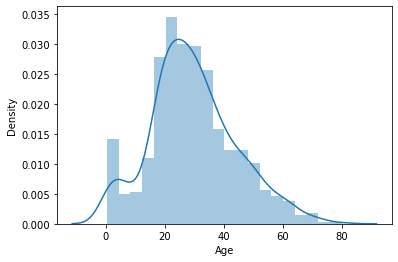

In [12]:
##numerical Attrributes
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

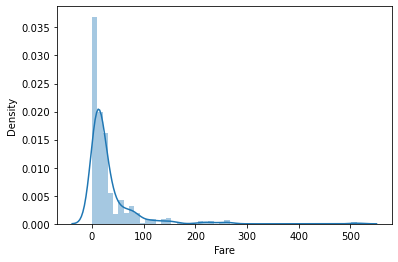

In [13]:
sns.distplot(train['Fare'])

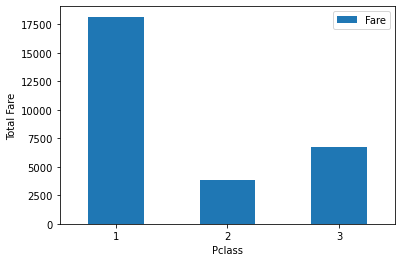

In [14]:
class_fare=train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

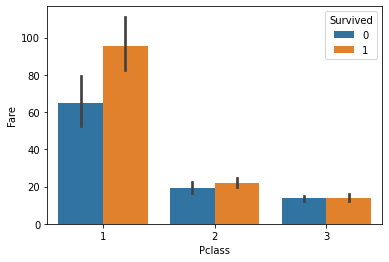

In [15]:
sns.barplot(data=train,x='Pclass',y='Fare',hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

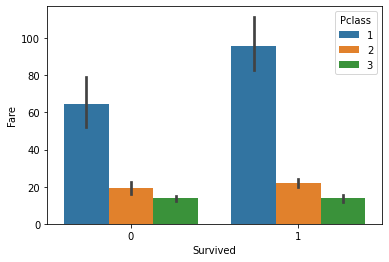

In [16]:
sns.barplot(data=train,x='Survived',y='Fare',hue='Pclass')

# data Preprocessing 

In [17]:
train_len=len(train)
#combining two dataframe
df=pd.concat([train,test],axis=0)
df=df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [19]:
train_len

891

# find the Null Values
df.isnull().sum()

In [20]:
#Drop columns
df=df.drop(columns=['Cabin'],axis=1)

In [21]:
df['Age'].mean()

29.881137667304014

In [22]:
#Fill Missing Values Using Mean of that Columns(for Numerical Values)
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Age'].fillna(df['Fare'].mean())

In [23]:
df['Embarked'].mode()[0]

'S'

In [24]:
#Fill Missing Values Using Mode of that Columns(for categorical Values)
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

# Log Transformation for data Distribution

<AxesSubplot:xlabel='Fare', ylabel='Density'>

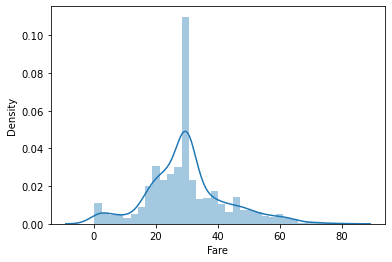

In [25]:
sns.distplot(df['Fare']) 

In [26]:
df['Fare'] = np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

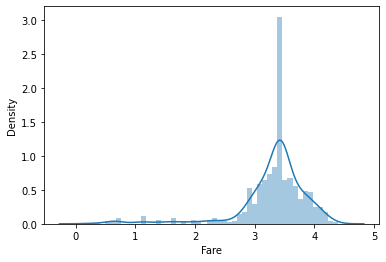

In [27]:
sns.distplot(df['Fare'])

# Correlation Matrix

<AxesSubplot:>

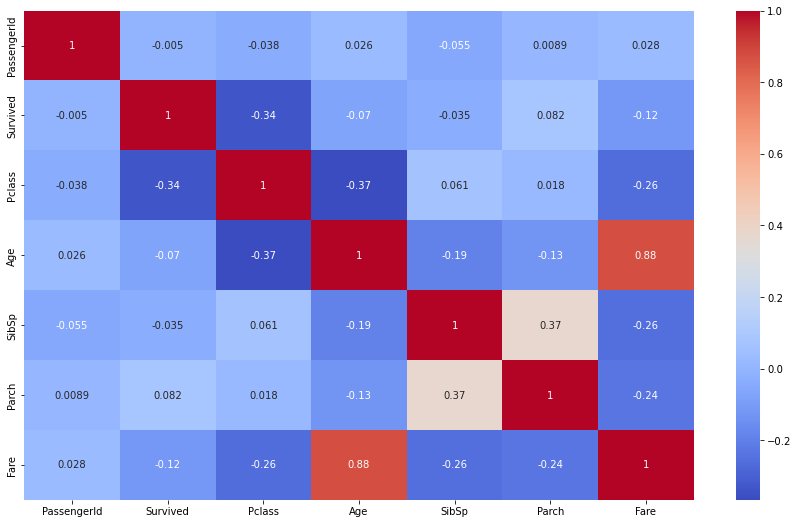

In [28]:
corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,3.135494,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3.663562,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,3.295837,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.583519,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,3.583519,S


In [30]:
## Drop Unnecessary Columns
df= df.drop(columns=['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,3.135494,S
1,2,1.0,1,female,38.0,1,0,3.663562,C
2,3,1.0,3,female,26.0,0,0,3.295837,S
3,4,1.0,1,female,35.0,1,0,3.583519,S
4,5,0.0,3,male,35.0,0,0,3.583519,S


In [31]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,3.135494,2
1,2,1.0,1,0,38.0,1,0,3.663562,0
2,3,1.0,3,0,26.0,0,0,3.295837,2
3,4,1.0,1,0,35.0,1,0,3.583519,2
4,5,0.0,3,1,35.0,0,0,3.583519,2


# Train-Test Split 

In [32]:
train=df.iloc[:train_len, :]
test=df.iloc[train_len:, :]

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,3.135494,2
1,2,1.0,1,0,38.0,1,0,3.663562,0
2,3,1.0,3,0,26.0,0,0,3.295837,2
3,4,1.0,1,0,35.0,1,0,3.583519,2
4,5,0.0,3,1,35.0,0,0,3.583519,2


In [34]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,3.569533,1
892,893,NaN,3,0,47.0,1,0,3.871201,2
893,894,NaN,2,1,62.0,0,0,4.143135,1
894,895,NaN,3,1,27.0,0,0,3.332205,2
895,896,NaN,3,0,22.0,1,1,3.135494,2


In [35]:
# input split
x=train.drop(columns=['PassengerId','Survived'],axis=1)
y=train ['Survived']

In [36]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,3.135494,2
1,1,0,38.0,1,0,3.663562,0
2,3,0,26.0,0,0,3.295837,2
3,1,0,35.0,1,0,3.583519,2
4,3,1,35.0,0,0,3.583519,2


In [37]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

# Model Training

In [38]:
# classify columns
from sklearn.model_selection import train_test_split,cross_val_score
def classify(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy:',model.score(x_test,y_test))
    score=cross_val_score(model,x,y,cv=5)
    print(score)
    print('cv Score:',np.mean(score))


In [39]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model)

Accuracy: 0.8161434977578476
[0.80446927 0.80337079 0.80337079 0.78089888 0.84831461]
cv Score: 0.8080848659845584


In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Accuracy: 0.7309417040358744
[0.73743017 0.79775281 0.80898876 0.80337079 0.83146067]
cv Score: 0.7958006402611261


In [41]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

Accuracy: 0.8026905829596412
[0.74860335 0.80337079 0.8258427  0.82022472 0.85955056]
cv Score: 0.8115184232000502


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model)

Accuracy: 0.7982062780269058
[0.74301676 0.79775281 0.83146067 0.78651685 0.83707865]
cv Score: 0.7991651497081163


In [43]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

Note: you may need to restart the kernel to use updated packages.

# All requested packages already installed.

Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [44]:

from xgboost import XGBClassifier
model=XGBClassifier()
classify(model)

Accuracy: 0.7757847533632287
[0.81564246 0.81460674 0.82022472 0.81460674 0.85393258]
cv Score: 0.8238026489234824


In [45]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [46]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
classify(model)

Accuracy: 0.7937219730941704
[0.79888268 0.82022472 0.8258427  0.83146067 0.83707865]
cv Score: 0.8226978846274561


In [47]:
conda install -c conda-forge catboost

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done





==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c conda-forge conda


# All requested packages already installed.

Retrieving notices: ...working... done


In [48]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8161434977578476
[0.79329609 0.82022472 0.83707865 0.80337079 0.84831461]
cv Score: 0.8204569706860838


# Complete Model Training with Full Data

In [49]:
model=LGBMClassifier()
model.fit(x,y)

LGBMClassifier()

In [50]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,3.569533,1
892,893,NaN,3,0,47.0,1,0,3.871201,2
893,894,NaN,2,1,62.0,0,0,4.143135,1
894,895,NaN,3,1,27.0,0,0,3.332205,2
895,896,NaN,3,0,22.0,1,1,3.135494,2


In [51]:
# input split for test data
x_test=test.drop(columns=['PassengerId','Survived'],axis=1)

In [52]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,3.569533,1
892,3,0,47.0,1,0,3.871201,2
893,2,1,62.0,0,0,4.143135,1
894,3,1,27.0,0,0,3.332205,2
895,3,0,22.0,1,1,3.135494,2


In [53]:
pred=model.predict(x_test)
pred

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

# Test Submission 

In [54]:
sub=pd.read_csv("gender_submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [55]:
sub['Survived']=pred

sub.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0
